# Laboratory No. 2. Statistical Inference
# Excercise 1, 2, 3:
# Gaussian Model Fitting used closed form and Laplace approximation
### presented by: Juan David Gil and Juan Sebastián Silva
### Date: 29 february 2016

In these first three excercise a gaussian model parameters will be founded using in a first step a closed form, putting a Gaussian prior for the mean with known variance in the first excercise, then putting a Normal-Gamma prior for the precision and a leaving the Guassian for the mean, finally a Laplace approximation is used in order to see how well behaves approximating  the posterior over the parameters of the Gaussian model.

In [1]:
% pylab inline
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pylab as pb
from matplotlib import cm
from scipy import stats
from scipy.stats import norm
from scipy.special import gamma
from scipy.stats import chi
from scipy.stats import multivariate_normal

Populating the interactive namespace from numpy and matplotlib


## Fitting a Gaussian Model with known variance(precision) and prior over mean

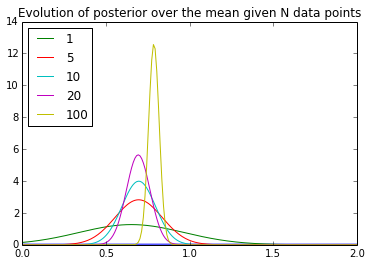

In [2]:
mean_real = 0.8 # Real mean of the
var_real = 0.1 # Real variance of the data
N = 100
X = np.random.normal(mean_real, np.sqrt(var_real), N)
X_eval = np.linspace(0.0,2.0,200)
mean_prior = 0.0 # Prior mean for the distribution over the mean
var_prior = 10.0 # Prior variance for the distribution over the variance
n_dat = [1,5,10,20,100]
Y = norm.pdf(X_eval, mean_prior, var_prior)
pb.figure(1)
pb.title('Evolution of posterior over the mean given N data points')
pb.plot(X_eval,Y)
for n in n_dat:
    mean_ml = (1.0/n)*np.sum(X[0:n])
    posterior_mean = ((var_real/(n*var_prior + var_real))*mean_prior) + (n*var_prior/(n*var_prior + var_real))*mean_ml
    posterior_var = (var_prior*var_real)/(n*var_prior + var_real)
    y = norm.pdf(X_eval, posterior_mean, np.sqrt(posterior_var))
    mlabel = str(n)
    pb.plot(X_eval, y, label=mlabel)
    pb.legend(loc='upper left')

As one can see the posterior over the mean tends to be centered at the real mean that is 0.8, with a hundred points the estimation is really good, thanks to the fact that the estimation of the posterior is closed.

## Fitting a Gaussian model with Gaussian prior over the mean and Normal Gamma prior over the precision

In [3]:
np.random.seed(2)
def showNormalGamma(a_n, b_n, mean_prior, beta_prior, title, tolerance_mean=1.0, tolerance_lambda=1.0):
    m = 20
    if(beta_prior - tolerance_lambda < 0.0):
        mlow = 0.1
    else:
        mlow = beta_prior - tolerance_lambda
    mhigh = beta_prior + tolerance_lambda
    m_lambda = np.linspace(mlow, mhigh, m)
    
    mlow = mean_prior - tolerance_mean
    mhigh = mean_prior + tolerance_mean
    m_mean = np.linspace(mlow, mhigh, m)
    
    z = np.zeros((m,m))
    i = 0
    #print (a_n-0.5)/b_n
    for t_lambda in m_lambda:
        j = 0
        mgamma = gamma(a_n)
        result_gamma = (1.0/mgamma)*(b_n**a_n)*(t_lambda**(a_n-1.0))*np.exp(-1.0*b_n*t_lambda)
        for t_mean in m_mean:
            mvar = 1.0/(beta_prior*t_lambda)
            y = multivariate_normal.pdf(t_mean, mean=mean_prior, cov=mvar)
            z[j,i] = y*result_gamma
            j+=1
        i+=1
    pb.title(title + 'over the mean and precision')
    #pb.imshow(z, extent=[8.0,12.0,-1.0,1.0])
    pb.contourf(m_lambda, m_mean, z)
    return
    
beta_prior = 0.1
mean_prior = 1.0
a_n = 2.0
b_n = 1.0
showNormalGamma(a_n, b_n, mean_prior, beta_prior, 'prior', 5.0, 3.0)

AttributeError: 'builtin_function_or_method' object has no attribute 'pdf'

In [421]:
real_mean = 0.5
precision = 0.1
real_var = 1.0/precision
np.random.seed(2)
N = 1000000
X = np.random.normal(real_mean, np.sqrt(real_var), N)
mean_ml = np.sum(X)/N
mean_posterior = (beta_prior*mean_prior + N*mean_ml)/(beta_prior + N)
beta_posterior = beta_prior + N
a_n = a_n + (N/2.0)
b_n = b_n + (0.5*(np.dot(X - mean_ml, X - mean_ml))) + ((beta_prior*N*(mean_ml - mean_prior)*(mean_ml - mean_prior))/2.0*(beta_prior + N))
exp_lambda = a_n/b_n
print 'Real mean: ', real_mean, ' Real precision : ', precision
print 'Posterior_mean: ', mean_posterior, ' Posterior Precision: ', exp_lambda

Real mean:  0.5  Real precision :  0.1
Posterior_mean:  0.496909833627  Posterior Precision:  4.43245141949e-05


In [423]:
#showNormalGamma(a_n, b_n, mean_posterior, beta_posterior, 'posterior', 5.0, 3.0)

Only by watching the data one can see that the mean is predicted very well, but it's not the same for the precision

## Using Laplace Approximation for computing the posterior for mean and precision of a gaussian model

Mean ML:  0.496909783318
Optim value for prec:  0.10015791446
[[   100157.91456077         0.        ]
 [        0.          49842608.33554225]]


<matplotlib.contour.QuadContourSet instance at 0x154bd7b48>

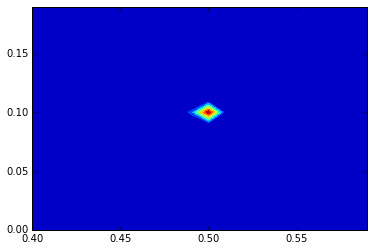

In [424]:
real_mean = 0.5
precision = 0.1
real_var = 1.0/precision

beta_prior = 0.1
mean_prior = 1.0
a_n = 2.0
b_n = 1.0
N = 1000000
np.random.seed(2)
X = np.random.normal(real_mean, np.sqrt(real_var), N)
mean_ml = np.asscalar(np.sum(X)/N)
mprec = (N + 2*a_n)/(np.dot(X - mean_ml, X - mean_ml) + (2.0*b_n))
print 'Mean ML: ', mean_ml
print 'Optim value for prec: ', (N + 2*a_n)/(np.dot(X - mean_ml, X - mean_ml) + (2.0*b_n))

mean_lap = np.array([mean_ml, mprec])
Hessian_lap = np.zeros((2,2))
Hessian_lap[0,0] = (mprec*(N)) + ((beta_prior**2.0)*(mprec**2.0))
Hessian_lap[0,1] = Hessian_lap[1,0] = 0.0
Hessian_lap[1,1] = (N/(2.0*(mprec**2.0))) + (0.5/(mprec**2.0)) + ((a_n - 1.0)/(mprec**2.0))
print Hessian_lap
x, y = np.mgrid[0.4:0.6:.01, 0.0:0.2:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = stats.multivariate_normal(mean_lap, np.linalg.inv(Hessian_lap))
plt.contourf(x, y, rv.pdf(pos))